# Part I Softmax Regression

## Qsr1

**(1) Show that probabilities sum to 1**

$$P[y=1] = \frac{1}{1+e^{-\vec{w}\cdot \vec{x}}} = \frac{e^{\vec{w}\cdot \vec{x}}}{e^{\vec{w}\cdot \vec{x}} + e^{\vec{0} \cdot \vec{x}}}$$

$$P[y=0] = 1 - \frac{1}{1+e^{-\vec{w}\cdot \vec{x}}} = \frac{e^{\vec{0} \cdot \vec{x}}}{e^{\vec{w}\cdot \vec{x}} + e^{\vec{0}\cdot \vec{x}}}$$

$$P[y=i] = \frac{e^{\vec{w_i} \cdot \vec{x}}}{\sum_j{e^{\vec{w_j} \cdot \vec{x}}}}$$

Summing all probabilities:

$$\sum_i{P[y=i]} = \sum_i{
    \frac{e^{\vec{w_i} \cdot \vec{x}}}{\sum_j{e^{\bar{w_j}\cdot \vec{x}} }}
    =
    \frac{
        \sum_i{e^{\vec{w_i} \cdot \vec{x}}}
    }{
        \sum_j{e^{\bar{w_j}\cdot \vec{x}} }    }
    = 1
}$$

Proven.

**(2) What are the dimensions of $W$? $X$? $WX$?**

$\vec{x_i}$ is $n$ dimensional.\
Thus $\vec{x_i}$ is a $(1 \times n)$ matrix.

Say we have $m$ classes.\
Then $W$ is a $(n \times m)$ matrix.

Say we have $p$ examples.\
Then $X$ is a $(p \times n)$ matrix.

Thus $WX$ is a $(p \times m)$ matrix.

## Qsr2: code

## Qsr3

In the cost function, we see the line

```python
W_X = W_X - np.max(W_X)
```
This means that each entry is reduced by the largest entry in the matrix.

**(1) Show that this does not affect the predicted probabilities.**

We are given from above that probability is:

$$P[y=i] = \frac{e^{\vec{w_i} \cdot \vec{x}}}{\sum_j{e^{\vec{w_j} \cdot \vec{x}}}}$$

We can write that code line above as

$$WX = WX - \max{(WX)}$$

Manipulating the probability equation:

$$
\begin{align}P[y=i]
&= 
\frac{
\left( \frac{1}{e^{\max{(WX)}}} \right)}
{\left( \frac{1}{e^{\max{(WX)}}} \right)}

\frac{e^{\vec{w_i} \cdot \vec{x}}}{\sum_j{e^{\vec{w_j} \cdot \vec{x}}}}\\
&= \frac{e^{\vec{w_i} \cdot \vec{x} - \max{(WX)}}}
{\sum_j{e^{\vec{w_j} \cdot \vec{x} - \max{(WX)}}}}
\end{align}
$$

Therefore, the probability is not affected by the subtraction of the maximum.

**(2) Why might this be an optimization over using W_X? Justify your answer.**

Calculating any exponential can result in huge numbers, and may result in buffer overflow. Dividing a huge number is computationally difficult as well. The usage of $\max(WX)$ is to reduce the size of the exponential, and thus reduce the computational cost.

## Qsr4
**Use the `learningCurve` function in `runClassifier.py` to plot the accuracy of the classifier as a function of the number of examples seen. Include the plot in your write-up. Do you observe any overfitting or underfitting? Discuss and expain what you observe.**

In [10]:
from runClassifier import *
from softmax import *
from utils import *
# use the learningCurve function in runClassifier.py to plot the learning curve for the softmax classifier
# on the provided data. You should see a plot similar to the one in the writeup.
exSize = 28*28
numClasses = 10
reg = 0.0001
X, Y = loadMNIST('data/train-images.idx3-ubyte', 'data/train-labels.idx1-ubyte')
testX, testY = loadMNIST('data/t10k-images.idx3-ubyte', 'data/t10k-labels.idx1-ubyte')
dataSizes, trainAcc, testAcc = learningCurve(SoftmaxRegression(numClasses, exSize), numClasses, exSize, X, Y, testX, testY)

60000
16
1
(784, 2)
(2,)
Training classifier on 2 points...
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         7840     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.45388D+00    |proj g|=  4.50000D-01

At iterate    1    f=  7.54791D-01    |proj g|=  2.56845D-01

At iterate    2    f=  7.35419D-01    |proj g|=  2.49947D-01

At iterate    3    f=  6.93397D-01    |proj g|=  2.49922D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 7840      4     59      2     0     0   2.499D-01   6.934D-01
  F =  0.69339723797348007     

ABNORMAL_

 This problem is unconstrained.
/Users/andreanpriadi/Documents/Academic/UMD/CMSC422-MachineLearning/cmsc-422-introduction-to-machine-learning/p3/softmax.py:98: RuntimeWarning: invalid value encountered in divide
  probabilities = np.exp(W_X) / np.sum(np.exp(W_X), axis=0)
/Users/andreanpriadi/Documents/Academic/UMD/CMSC422-MachineLearning/cmsc-422-introduction-to-machine-learning/p3/softmax.py:99: RuntimeWarning: divide by zero encountered in log
  cost = -1 * np.sum(np.multiply(np.log(probabilities), indicator)) / N
/Users/andreanpriadi/Documents/Academic/UMD/CMSC422-MachineLearning/cmsc-422-introduction-to-machine-learning/p3/softmax.py:99: RuntimeWarning: invalid value encountered in log
  cost = -1 * np.sum(np.multiply(np.log(probabilities), indicator)) / N
/Users/andreanpriadi/Documents/Academic/UMD/CMSC422-MachineLearning/cmsc-422-introduction-to-machine-learning/p3/softmax.py:99: RuntimeWarning: invalid value encountered in multiply
  cost = -1 * np.sum(np.multiply(np.log(probabi

At iterate   13    f=  6.69782D-05    |proj g|=  1.52075D-05

At iterate   14    f=  3.69401D-05    |proj g|=  8.24258D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 7840     14     15      1     0     0   8.243D-06   3.694D-05
  F =   3.6940080143605852E-005

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Training accuracy 1, test accuracy 0.4004
6
(784, 59)
(59,)
Training classifier on 59 points...
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         7840     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.63305D+00  

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


At iterate    5    f=  1.92107D-01    |proj g|=  1.77812D-02

At iterate    6    f=  1.16011D-01    |proj g|=  9.31120D-03

At iterate    7    f=  8.67062D-02    |proj g|=  6.39718D-03

At iterate    8    f=  5.42668D-02    |proj g|=  3.55085D-03

At iterate    9    f=  2.17283D-02    |proj g|=  3.48746D-03

At iterate   10    f=  1.54659D-02    |proj g|=  3.43064D-03

At iterate   11    f=  1.22592D-02    |proj g|=  1.60071D-03

At iterate   12    f=  9.70373D-03    |proj g|=  8.02420D-04

At iterate   13    f=  7.21303D-03    |proj g|=  4.51048D-04

At iterate   14    f=  5.00244D-03    |proj g|=  6.45800D-04

At iterate   15    f=  3.21148D-03    |proj g|=  5.19249D-04

At iterate   16    f=  2.67258D-03    |proj g|=  3.60235D-04

At iterate   17    f=  1.85282D-03    |proj g|=  1.78507D-04

At iterate   18    f=  1.41804D-03    |proj g|=  2.01788D-04

At iterate   19    f=  1.01317D-03    |proj g|=  9.10477D-05

At iterate   20    f=  8.69403D-04    |proj g|=  6.33513D-05

At itera

 This problem is unconstrained.
 This problem is unconstrained.


At iterate   27    f=  1.00986D-03    |proj g|=  5.33571D-05

At iterate   28    f=  7.89979D-04    |proj g|=  4.39522D-05

At iterate   29    f=  6.62478D-04    |proj g|=  9.43964D-05

At iterate   30    f=  5.51547D-04    |proj g|=  3.58814D-05

At iterate   31    f=  4.96505D-04    |proj g|=  2.79849D-05

At iterate   32    f=  4.11702D-04    |proj g|=  4.14739D-05

At iterate   33    f=  3.40918D-04    |proj g|=  1.96051D-05

At iterate   34    f=  3.01603D-04    |proj g|=  1.82466D-05

At iterate   35    f=  2.20033D-04    |proj g|=  2.38978D-05

At iterate   36    f=  1.77027D-04    |proj g|=  3.42573D-05

At iterate   37    f=  1.25182D-04    |proj g|=  1.19606D-05

At iterate   38    f=  1.10743D-04    |proj g|=  7.18754D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized C

 This problem is unconstrained.



At iterate   12    f=  3.89510D-01    |proj g|=  5.17708D-03

At iterate   13    f=  3.57444D-01    |proj g|=  6.84976D-03

At iterate   14    f=  3.25065D-01    |proj g|=  3.69818D-03

At iterate   15    f=  3.02594D-01    |proj g|=  4.01744D-03

At iterate   16    f=  2.78310D-01    |proj g|=  4.18497D-03

At iterate   17    f=  2.49713D-01    |proj g|=  4.31799D-03

At iterate   18    f=  2.36354D-01    |proj g|=  4.66646D-03

At iterate   19    f=  2.15773D-01    |proj g|=  2.61329D-03

At iterate   20    f=  1.95016D-01    |proj g|=  3.15992D-03

At iterate   21    f=  1.80411D-01    |proj g|=  3.21403D-03

At iterate   22    f=  1.67947D-01    |proj g|=  2.81444D-03

At iterate   23    f=  1.56866D-01    |proj g|=  2.02523D-03

At iterate   24    f=  1.36116D-01    |proj g|=  3.32939D-03

At iterate   25    f=  1.29503D-01    |proj g|=  4.50865D-03

At iterate   26    f=  1.20444D-01    |proj g|=  3.20016D-03

At iterate   27    f=  1.06941D-01    |proj g|=  2.27347D-03

At iter

 This problem is unconstrained.



At iterate    9    f=  7.46845D-01    |proj g|=  3.15519D-03

At iterate   10    f=  7.21480D-01    |proj g|=  2.92369D-03

At iterate   11    f=  6.82932D-01    |proj g|=  3.13492D-03

At iterate   12    f=  6.47826D-01    |proj g|=  5.00545D-03

At iterate   13    f=  6.11443D-01    |proj g|=  3.19777D-03

At iterate   14    f=  5.80691D-01    |proj g|=  2.51786D-03

At iterate   15    f=  5.60492D-01    |proj g|=  5.73220D-03

At iterate   16    f=  5.39935D-01    |proj g|=  2.92506D-03

At iterate   17    f=  5.22509D-01    |proj g|=  2.64282D-03

At iterate   18    f=  5.02054D-01    |proj g|=  2.79272D-03

At iterate   19    f=  4.77567D-01    |proj g|=  2.36924D-03

At iterate   20    f=  4.62709D-01    |proj g|=  4.24229D-03

At iterate   21    f=  4.45622D-01    |proj g|=  1.95881D-03

At iterate   22    f=  4.34205D-01    |proj g|=  2.12240D-03

At iterate   23    f=  4.18148D-01    |proj g|=  4.02228D-03

At iterate   24    f=  4.01153D-01    |proj g|=  3.07802D-03

At iter

 This problem is unconstrained.



At iterate    1    f=  2.01866D+00    |proj g|=  2.81672D-03

At iterate    2    f=  1.99219D+00    |proj g|=  3.24801D-03

At iterate    3    f=  1.95937D+00    |proj g|=  3.47759D-03

At iterate    4    f=  1.88740D+00    |proj g|=  4.92291D-03

At iterate    5    f=  1.83668D+00    |proj g|=  5.73673D-03

At iterate    6    f=  1.77952D+00    |proj g|=  4.63066D-03

At iterate    7    f=  1.74834D+00    |proj g|=  2.53268D-03

At iterate    8    f=  1.71008D+00    |proj g|=  2.59078D-03

At iterate    9    f=  1.65956D+00    |proj g|=  3.84256D-03

At iterate   10    f=  1.61442D+00    |proj g|=  5.23703D-03

At iterate   11    f=  1.58156D+00    |proj g|=  2.11239D-03

At iterate   12    f=  1.56756D+00    |proj g|=  2.09026D-03

At iterate   13    f=  1.54563D+00    |proj g|=  2.61417D-03

At iterate   14    f=  1.49919D+00    |proj g|=  2.73075D-03

At iterate   15    f=  1.47887D+00    |proj g|=  4.12187D-03

At iterate   16    f=  1.44397D+00    |proj g|=  3.05615D-03

At iter

 This problem is unconstrained.



At iterate    2    f=  1.11433D+00    |proj g|=  2.67786D-03

At iterate    3    f=  1.09375D+00    |proj g|=  2.92045D-03

At iterate    4    f=  1.08579D+00    |proj g|=  4.28434D-03

At iterate    5    f=  1.07565D+00    |proj g|=  2.87512D-03

At iterate    6    f=  1.06295D+00    |proj g|=  2.01197D-03

At iterate    7    f=  1.05560D+00    |proj g|=  2.20455D-03

At iterate    8    f=  1.04239D+00    |proj g|=  2.90041D-03

At iterate    9    f=  1.03173D+00    |proj g|=  3.42608D-03

At iterate   10    f=  1.01676D+00    |proj g|=  1.84330D-03

At iterate   11    f=  1.00536D+00    |proj g|=  1.54312D-03

At iterate   12    f=  9.93117D-01    |proj g|=  1.92653D-03

At iterate   13    f=  9.81003D-01    |proj g|=  3.20375D-03

At iterate   14    f=  9.71808D-01    |proj g|=  3.52597D-03

At iterate   15    f=  9.61927D-01    |proj g|=  1.60110D-03

At iterate   16    f=  9.55994D-01    |proj g|=  1.61805D-03

At iterate   17    f=  9.46627D-01    |proj g|=  2.29803D-03

At iter

 This problem is unconstrained.



At iterate    2    f=  5.77536D-01    |proj g|=  4.77162D-03

At iterate    3    f=  5.46106D-01    |proj g|=  3.73964D-03

At iterate    4    f=  5.41676D-01    |proj g|=  1.17128D-02

At iterate    5    f=  5.27163D-01    |proj g|=  4.27887D-03

At iterate    6    f=  5.20683D-01    |proj g|=  1.70819D-03

At iterate    7    f=  5.14758D-01    |proj g|=  2.43851D-03

At iterate    8    f=  5.07678D-01    |proj g|=  2.16431D-03

At iterate    9    f=  4.96182D-01    |proj g|=  4.69666D-03

At iterate   10    f=  4.90632D-01    |proj g|=  5.28439D-03

At iterate   11    f=  4.84562D-01    |proj g|=  1.57679D-03

At iterate   12    f=  4.82116D-01    |proj g|=  1.34657D-03

At iterate   13    f=  4.79230D-01    |proj g|=  1.60041D-03

At iterate   14    f=  4.73187D-01    |proj g|=  2.13471D-03

At iterate   15    f=  4.71201D-01    |proj g|=  2.68755D-03

At iterate   16    f=  4.66895D-01    |proj g|=  1.58845D-03

At iterate   17    f=  4.63749D-01    |proj g|=  1.18568D-03

At iter

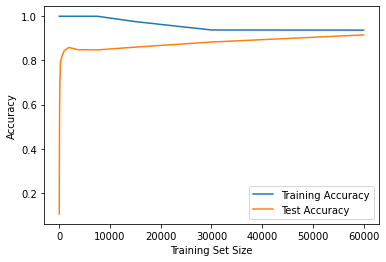

In [11]:
import matplotlib.pyplot as plt

# Create a new figure
plt.figure()

# Plot the training and test accuracies as a function of the training set size
plt.plot(dataSizes, [acc for acc in trainAcc], label="Training Accuracy")
plt.plot(dataSizes, [acc for acc in testAcc], label="Test Accuracy")

# Add axis labels and a legend
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend()

# Display the plot
plt.show()

TODO

# Part II NN

## Qnn 1.4

**When initializing the weight matrix, in some cases it may be appropriate to initialize the entries as small random numbers rather than all zeros.  Give one reason why this may be a good idea.**

If all the weights are initialised to all zeros, then there will be 0 updates as the gradient descent algorithm will not update. This means that the weights will not change, and thus the algorithm will not learn.